In [51]:
import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

/home/davi/anaconda3/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (0,1,18) have mixed types.Specify dtype option on import or set low_memory=False.



,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32782,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32783,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32784,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32785,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Start date to analysis: 2020-03-01

In [5]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[(df['date'] > '2020-03-01')]
df = df.sort_values(by=['total_cases'], ascending=True)
df

,date,location,total_cases,total_deaths,new_cases,new_deaths
20603,2020-03-17,Myanmar,0.0,0.0,0.0,0.0
62,2020-03-02,Afghanistan,1.0,0.0,0.0,0.0
28178,2020-03-15,Swaziland,1.0,0.0,1.0,0.0
10890,2020-03-15,Gabon,1.0,0.0,0.0,0.0
10891,2020-03-16,Gabon,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
30636,2020-03-14,United Arab Emirates,NaN,NaN,NaN,NaN
31910,2020-03-03,Vietnam,NaN,NaN,NaN,NaN
31911,2020-03-04,Vietnam,NaN,NaN,NaN,NaN
31912,2020-03-05,Vietnam,NaN,NaN,NaN,NaN


# 1. Number of cases and deaths in World

In [6]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

,date,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-02,89136.0,3046.0,2094.0,67.0
1,2020-03-03,90972.0,3118.0,1836.0,72.0
2,2020-03-04,93252.0,3202.0,2280.0,84.0
3,2020-03-05,95567.0,3282.0,2315.0,80.0
4,2020-03-06,98600.0,3384.0,3033.0,102.0
...,...,...,...,...,...
142,2020-07-22,14922665.0,616324.0,239463.0,6220.0
143,2020-07-23,15204874.0,623290.0,282209.0,6966.0
144,2020-07-24,15480762.0,633126.0,275888.0,9836.0
145,2020-07-25,15762581.0,639275.0,281819.0,6149.0


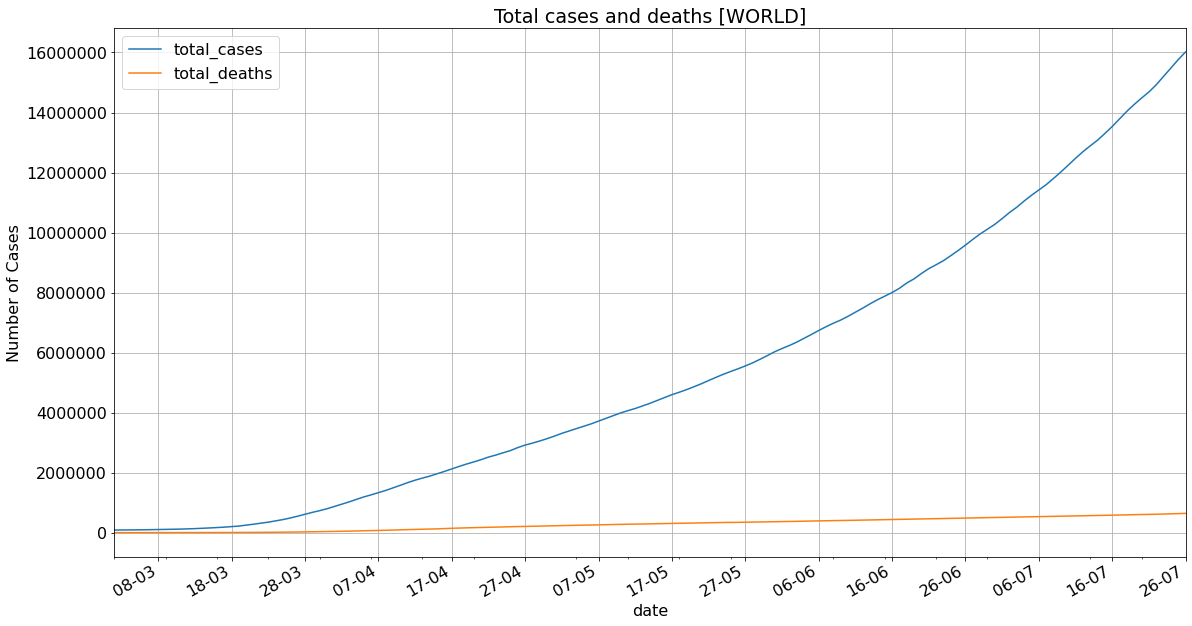

In [7]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases and deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New deaths per day

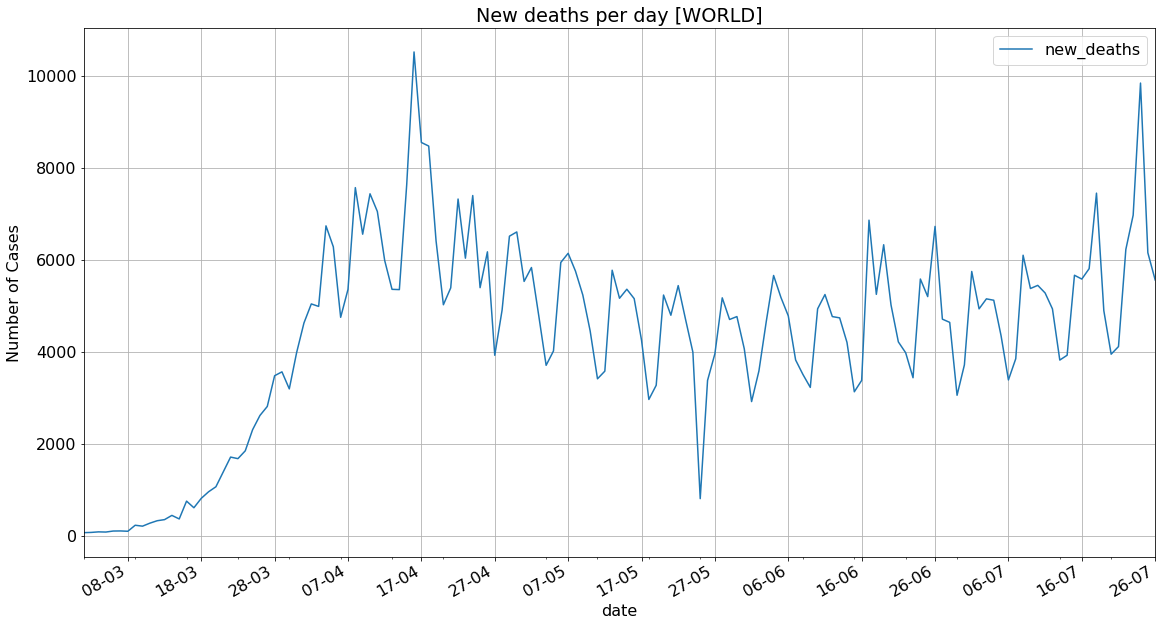

In [8]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New cases per day

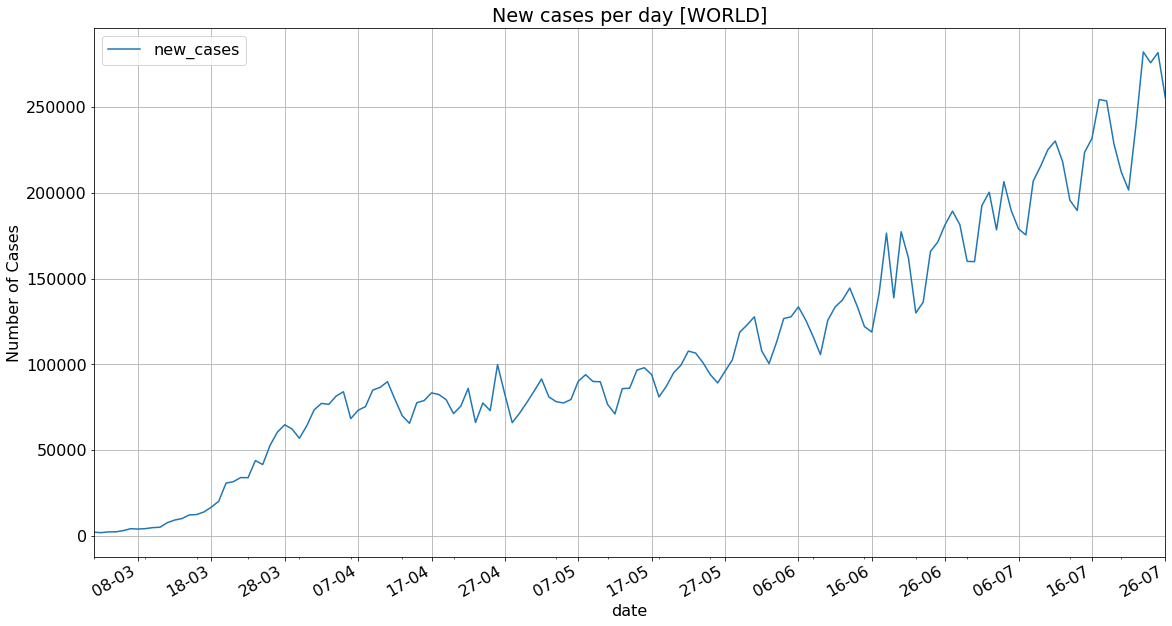

In [9]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [10]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

,date,location,total_cases,total_deaths,new_cases,new_deaths
31188,2020-07-26,United_States,4178027.0,146460.0,65498.0,914.0
31187,2020-07-25,United_States,4112529.0,145546.0,78427.0,1304.0
31186,2020-07-24,United_States,4034102.0,144242.0,63196.0,1052.0
31185,2020-07-23,United_States,3970906.0,143190.0,68848.0,1124.0
31184,2020-07-22,United_States,3902058.0,142066.0,72048.0,1160.0
...,...,...,...,...,...,...
15299,2020-07-21,Italy,244624.0,35058.0,190.0,13.0
15298,2020-07-20,Italy,244434.0,35045.0,218.0,3.0
15297,2020-07-19,Italy,244216.0,35042.0,249.0,14.0
15296,2020-07-18,Italy,243967.0,35028.0,231.0,11.0


In [11]:
myDate = df['date'].astype(str).unique()

In [12]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'Mexico', 'United_Kingdom', 'Italy'],
      dtype=object)

In [13]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [40]:
newDf_list=[]
for index in range(len(dfCountry)):  
    newDf = [d[index]['total_cases']]
    header = [dfCountry[index]]
    newDf = pd.concat(newDf, axis=1, keys=header)
    newDf_list.append(newDf)

## Total cases in the main countries

In [41]:
dfConcat = []
for index in range(len(dfCountry)):
    dfConcat = pd.concat(newDf_list, axis=1)
dfConcat.insert(0, 'date', myDate)
dfConcat.sort_values(by=['date'], ascending=False)

,date,United_States,Brazil,Mexico,United_Kingdom,Italy
130,2020-07-26,3118008.0,1755779.0,331298.0,298136.0,242363.0
131,2020-07-25,3184633.0,1800827.0,338913.0,298681.0,242639.0
132,2020-07-24,3247684.0,1839850.0,344224.0,299251.0,242827.0
133,2020-07-23,3304942.0,1864681.0,349396.0,300469.0,243061.0
134,2020-07-22,3363056.0,1884967.0,356255.0,301815.0,243230.0
...,...,...,...,...,...,...
54,2020-03-06,890524.0,52995.0,22088.0,143464.0,192994.0
58,2020-03-05,1012583.0,71886.0,27634.0,161145.0,201505.0
14,2020-03-04,3774.0,200.0,367.0,1391.0,23980.0
23,2020-03-03,55231.0,2201.0,1378.0,8077.0,69176.0


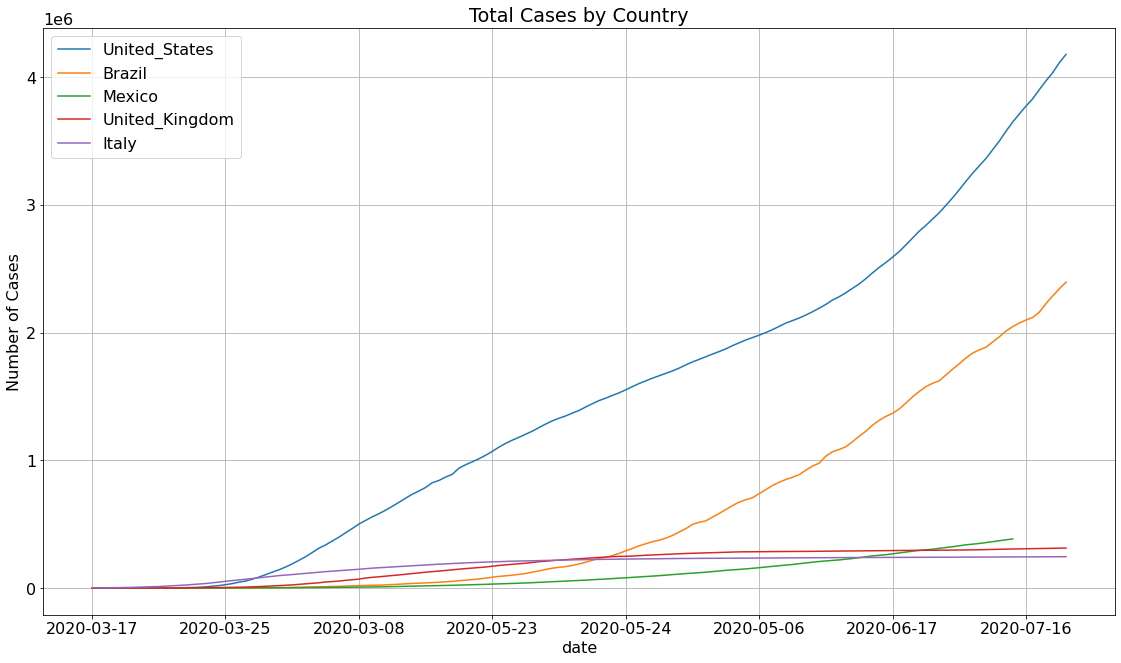

In [42]:
dfConcat.plot(x='date', y=dfCountry, figsize=(19.20,10.80))
plt.title('Total Cases by Country')
plt.ylabel('Number of Cases')
plt.grid()

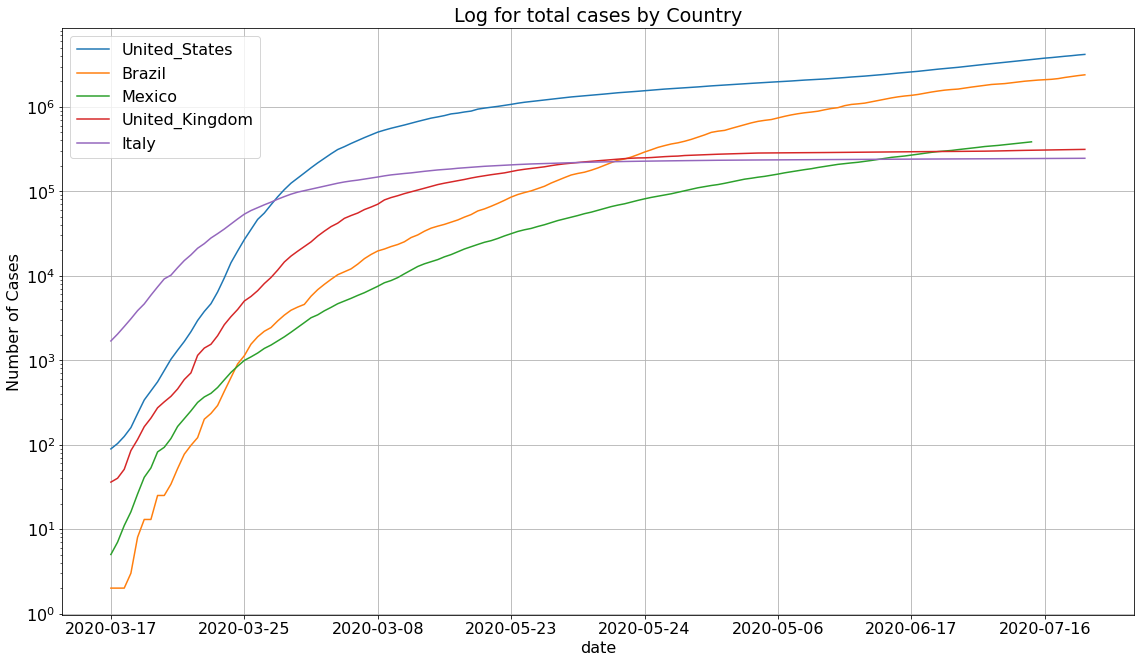

In [44]:
dfConcat.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))
plt.title('Log for total cases by Country')
plt.ylabel('Number of Cases')
plt.grid()

### New deaths per day by country

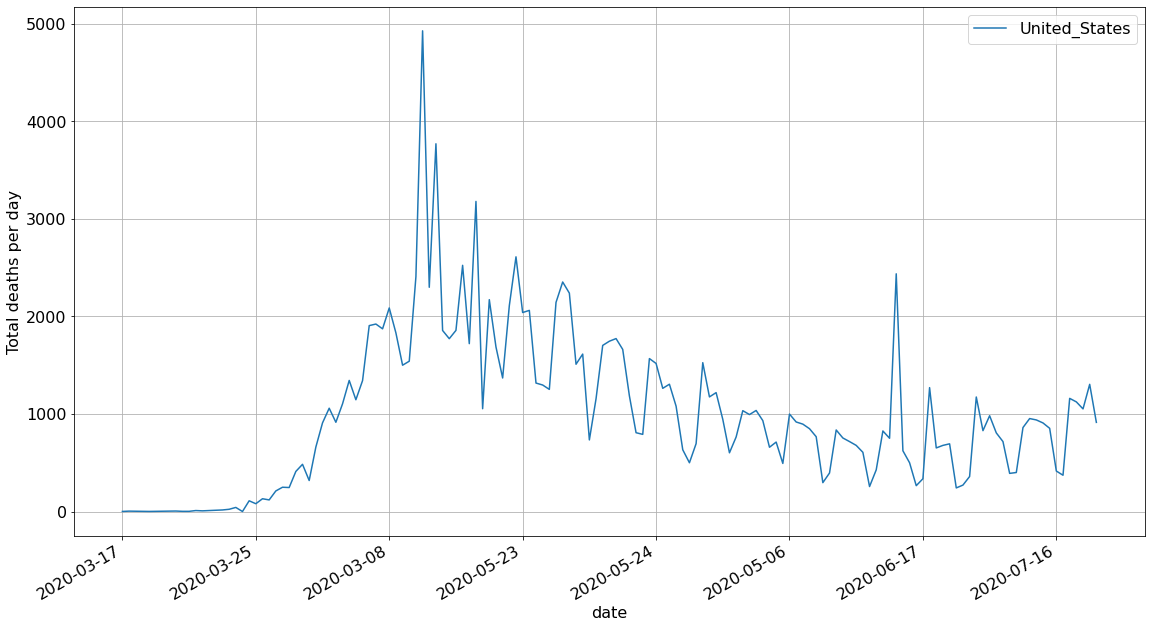

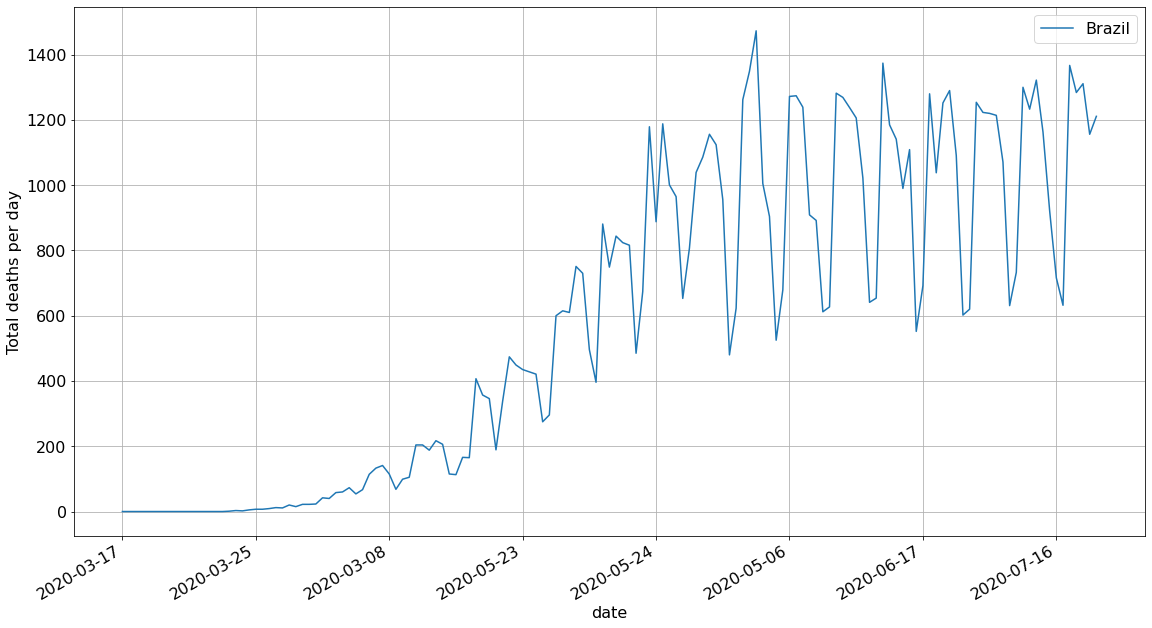

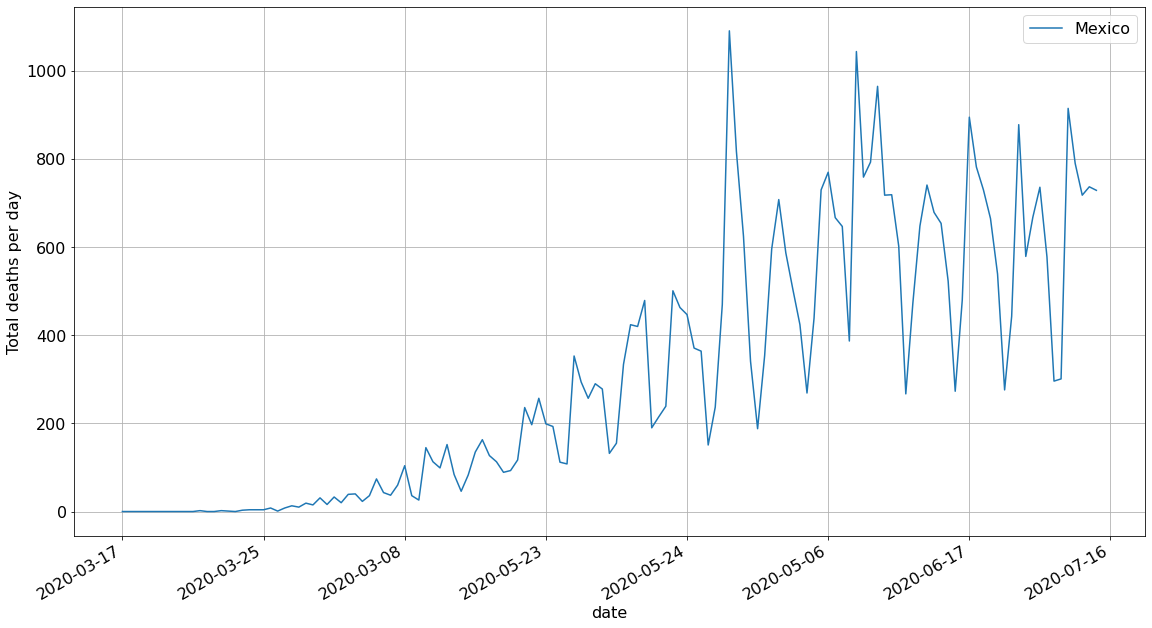

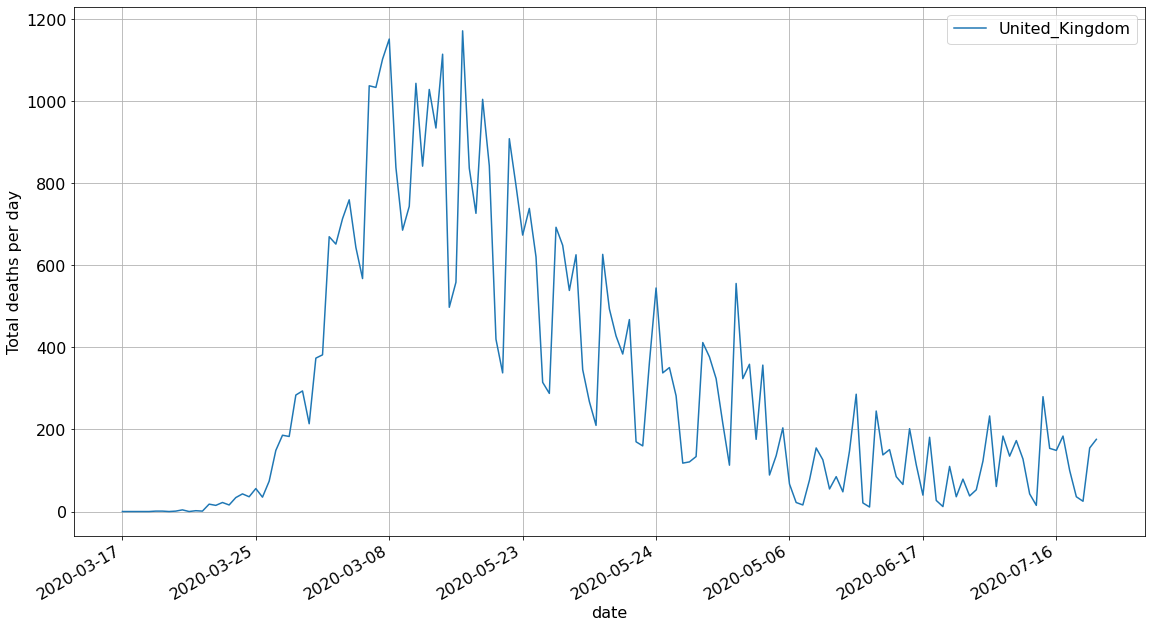

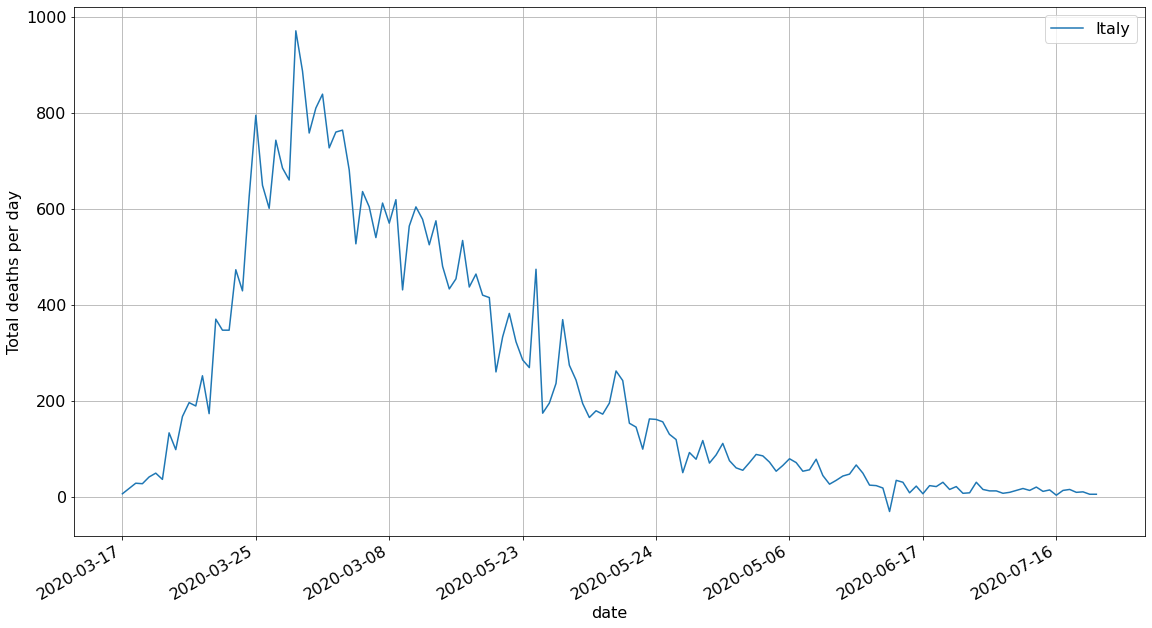

In [19]:
for index in range(len(dfCountry)):
    dfConcat.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    plt.ylabel('Total deaths per day')
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [20]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

,date,location,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-02,Brazil,2.0,0.0,0.0,0.0
1,2020-03-03,Brazil,2.0,0.0,0.0,0.0
2,2020-03-04,Brazil,2.0,0.0,0.0,0.0
3,2020-03-05,Brazil,3.0,0.0,1.0,0.0
4,2020-03-06,Brazil,8.0,0.0,5.0,0.0
...,...,...,...,...,...,...
142,2020-07-22,Brazil,2159654.0,81487.0,41008.0,1367.0
143,2020-07-23,Brazil,2227514.0,82771.0,67860.0,1284.0
144,2020-07-24,Brazil,2287475.0,84082.0,59961.0,1311.0
145,2020-07-25,Brazil,2343366.0,85238.0,55891.0,1156.0


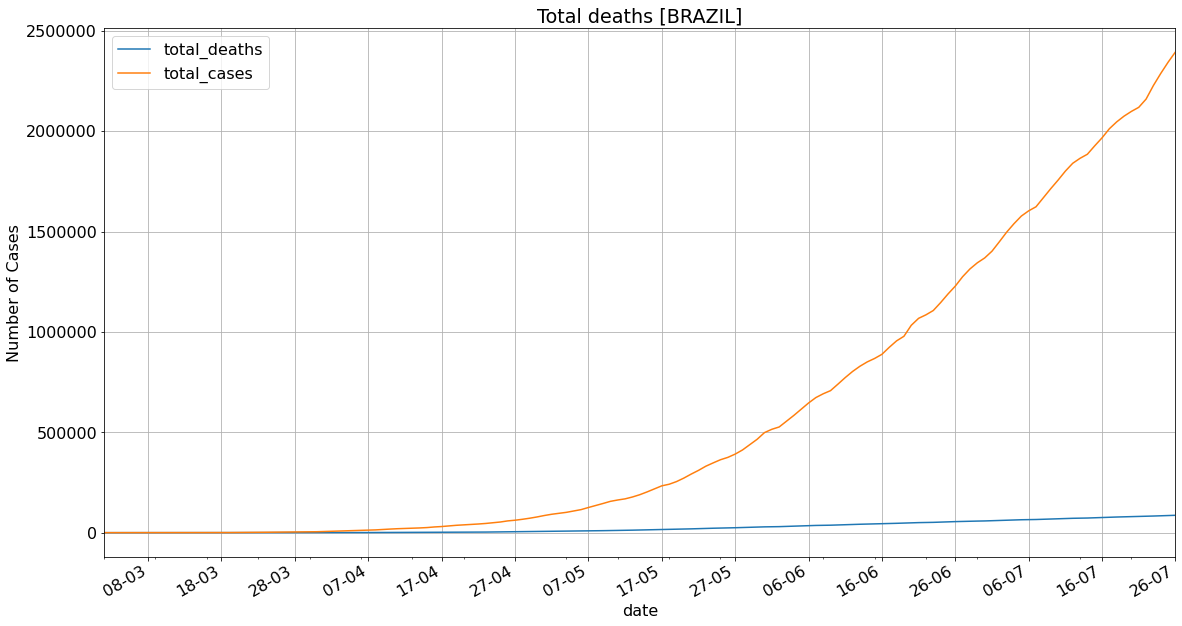

In [21]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

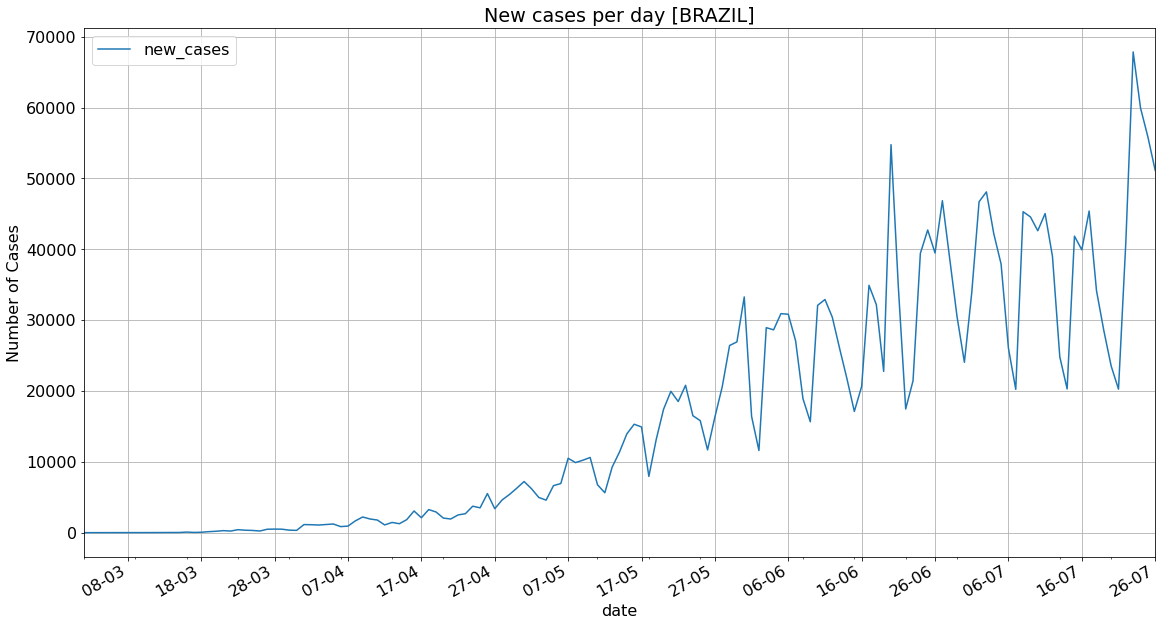

In [22]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

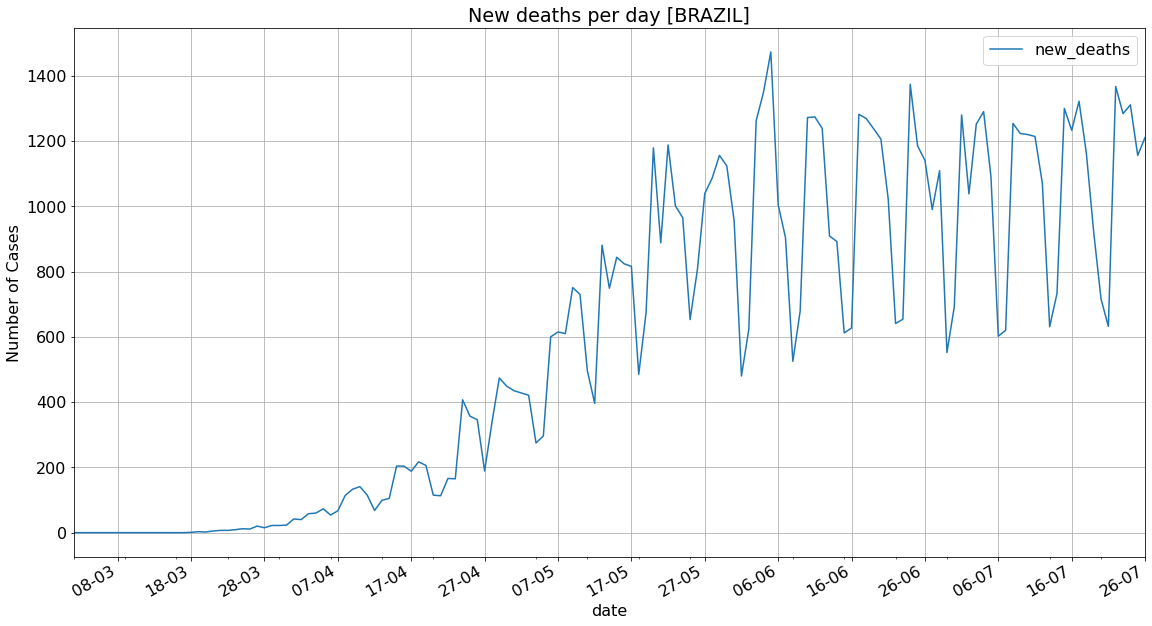

In [23]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [24]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

,date,new_deaths
0,2020-3-9,228.0
1,2020-3-10,208.0
2,2020-3-11,273.0
3,2020-3-12,326.0
4,2020-3-13,350.0
...,...,...
135,2020-7-22,6220.0
136,2020-7-23,6966.0
137,2020-7-24,9836.0
138,2020-7-25,6149.0


In [25]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [27]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

105 35


In [28]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [29]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [30]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [32]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 1s 104ms/step - loss: 0.1753 - mse: 0.1753 - val_loss: 0.2035 - val_mse: 0.2035
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1424 - val_mse: 0.1424
Epoch 3/50
11/11 [==============================] - 0s 14ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 4/50
11/11 [==============================] - 0s 24ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.0537 - val_mse: 0.0537
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 7/50
11/11 [==============================] - 0s 18ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 8/50
11/11 [==============================] - 0s 21ms/step - loss: 0.0209 - 

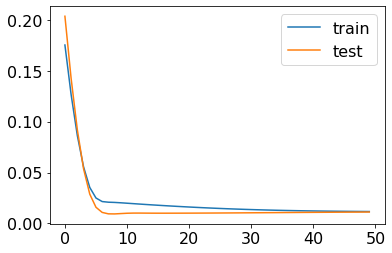

In [33]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [34]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [36]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1107.15 RMSE
Test Score: 1315.78 RMSE


In [37]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [38]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

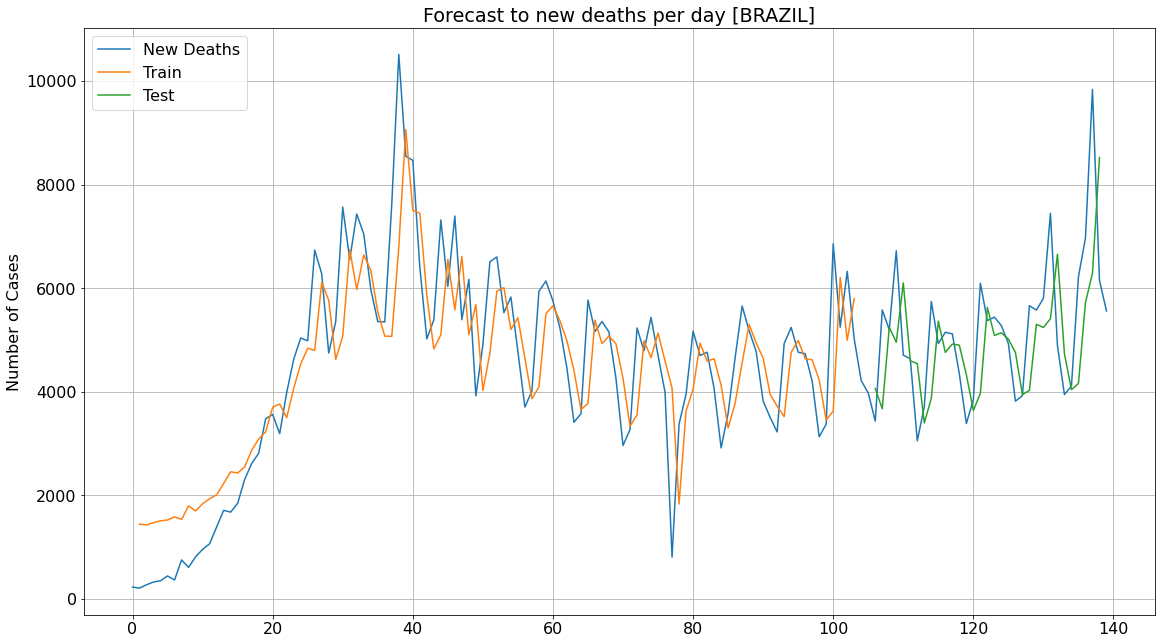

In [39]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [BRAZIL]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

In [45]:
df

,date,location,total_cases,total_deaths,new_cases,new_deaths
20603,2020-03-17,Myanmar,0.0,0.0,0.0,0.0
62,2020-03-02,Afghanistan,1.0,0.0,0.0,0.0
28178,2020-03-15,Swaziland,1.0,0.0,1.0,0.0
10890,2020-03-15,Gabon,1.0,0.0,0.0,0.0
10891,2020-03-16,Gabon,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
30636,2020-03-14,United Arab Emirates,NaN,NaN,NaN,NaN
31910,2020-03-03,Vietnam,NaN,NaN,NaN,NaN
31911,2020-03-04,Vietnam,NaN,NaN,NaN,NaN
31912,2020-03-05,Vietnam,NaN,NaN,NaN,NaN


### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

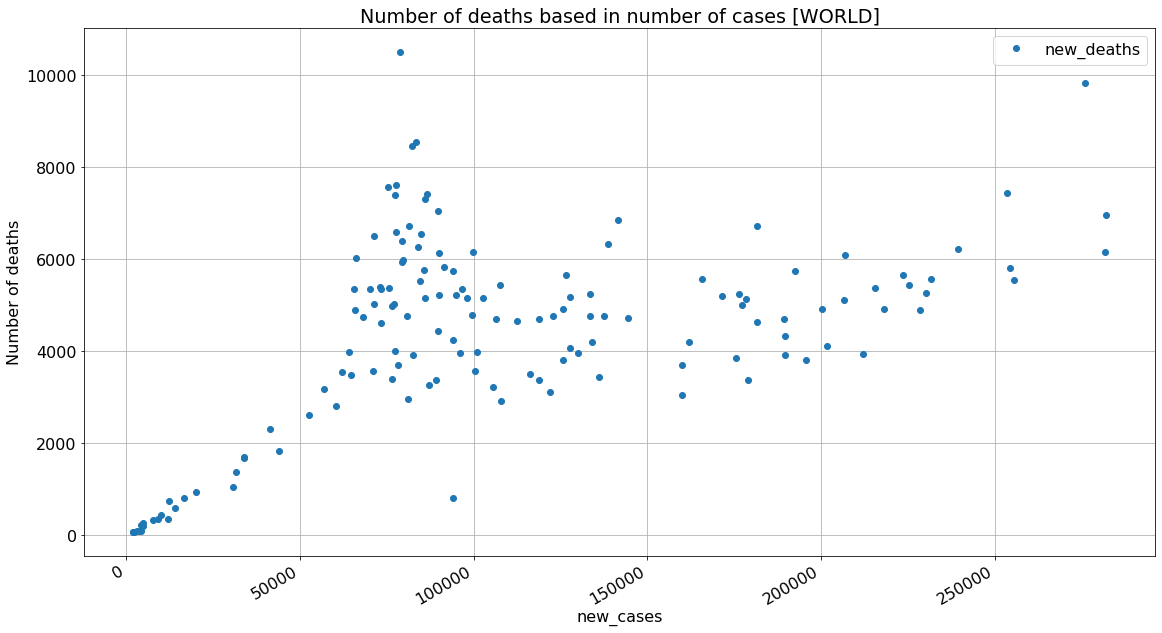

In [49]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

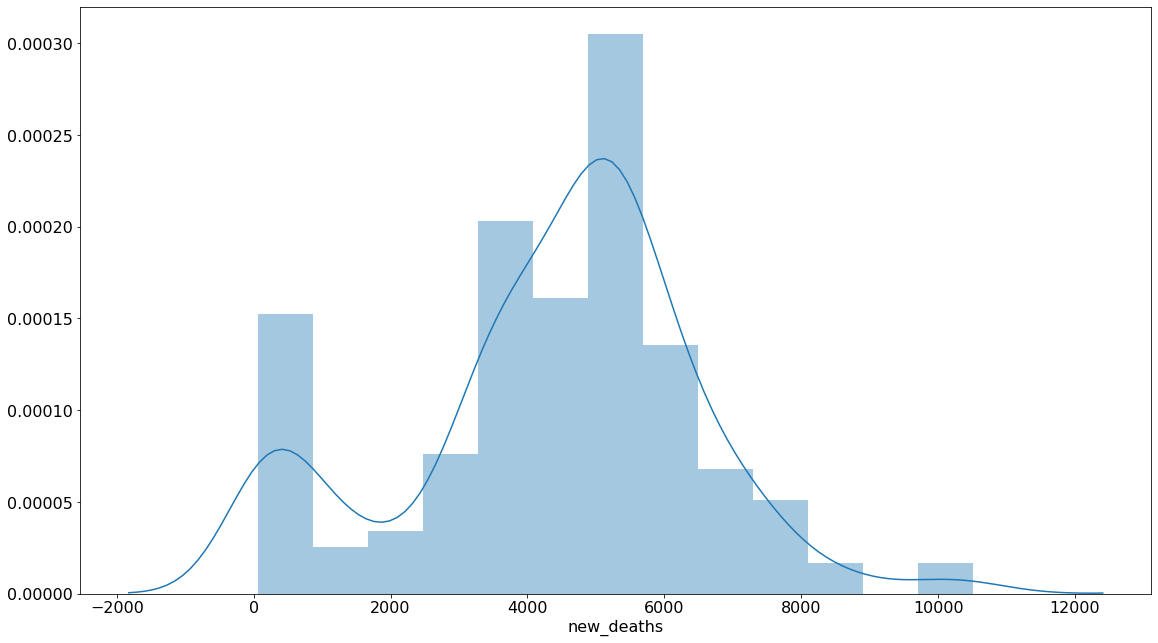

In [52]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [53]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [55]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
print(regressor.intercept_)

[28368.78750234]


In [57]:
print(regressor.coef_)

[[18.22637198]]


In [58]:
y_pred = regressor.predict(X_test)

In [61]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

,Actual,Predicted
0,4179.0,32524.40031
1,52745.0,75994.29749
2,62256.0,93272.89813
3,159914.0,96025.08030
4,282209.0,155333.69473
...,...,...
54,189703.0,107544.14739
55,160039.0,83995.67479
56,100431.0,93637.42557
57,181558.0,150868.23359


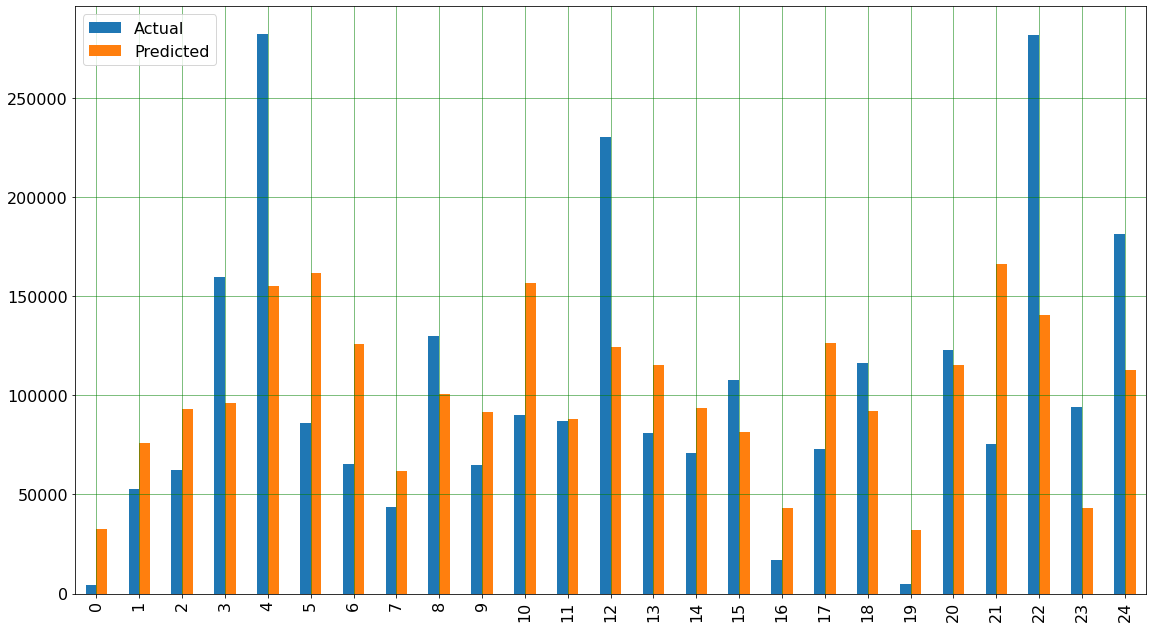

In [62]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

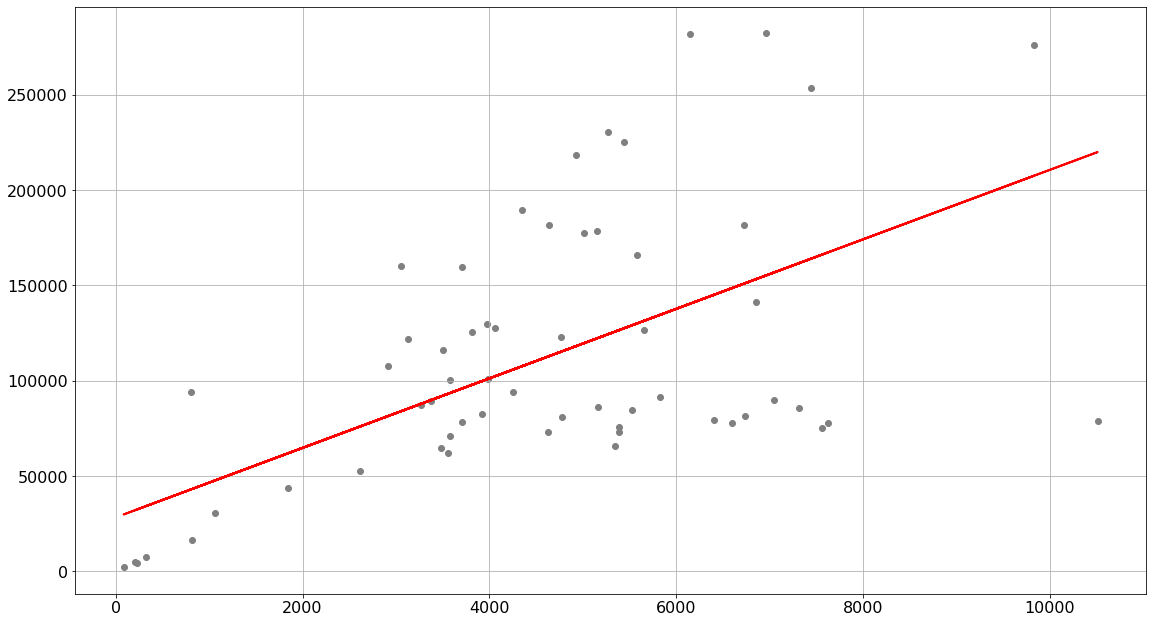

In [65]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 47609.065249757106
Mean Squared Error: 3435939341.7666225
Root Mean Squared Error: 3435939341.7666225


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [71]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

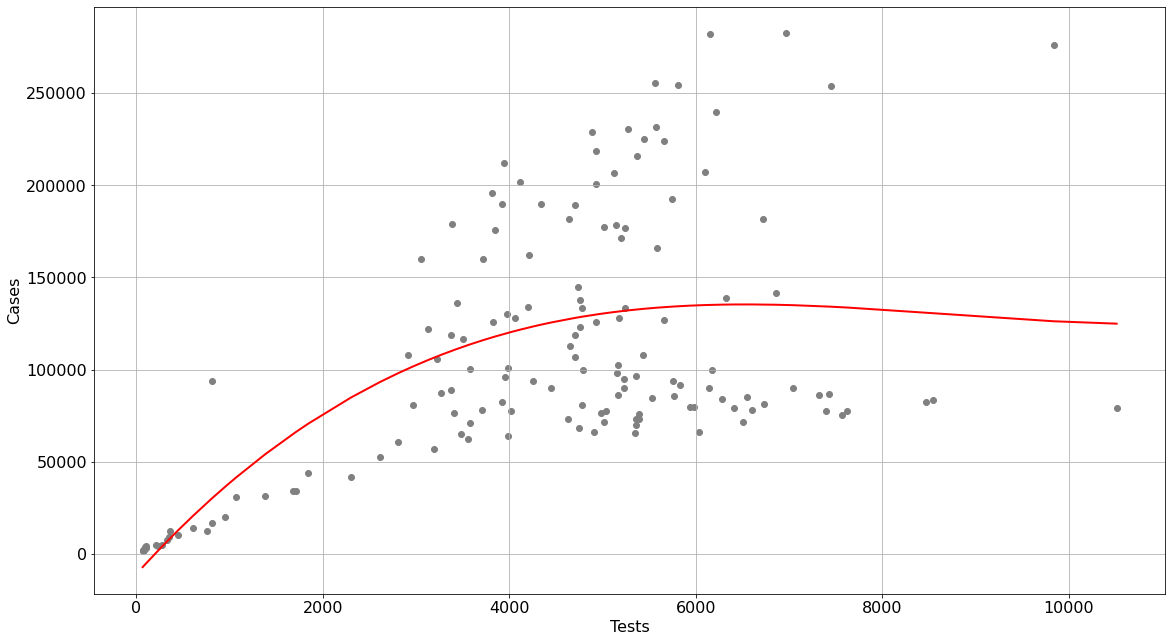

In [72]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()